#Import the required libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

#Importing Data Sets

In [15]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [16]:
df = pd.read_csv('housing.csv')

#Data Wrangling

In [17]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [19]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

In [20]:
missing_data = df.isnull()

In [21]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

date
date
False    21613
Name: count, dtype: int64

price
price
False    21613
Name: count, dtype: int64

bedrooms
bedrooms
False    21600
True        13
Name: count, dtype: int64

bathrooms
bathrooms
False    21603
True        10
Name: count, dtype: int64

sqft_living
sqft_living
False    21613
Name: count, dtype: int64

sqft_lot
sqft_lot
False    21613
Name: count, dtype: int64

floors
floors
False    21613
Name: count, dtype: int64

waterfront
waterfront
False    21613
Name: count, dtype: int64

view
view
False    21613
Name: count, dtype: int64

condition
condition
False    21613
Name: count, dtype: int64

grade
grade
False    21613
Name: count, dtype: int64

sqft_above
sqft_above
False    21613
Name: count, dtype: int64

sqft_basement
sqft_basement
False    21613
Name: count, dtype: int64

yr_built
yr_built
False    21613
Name: count, dtype: int64

yr_renovated
yr_renovated
False    21613
Name: count, dtype: int64

zipcode
zipcode
False    21613
Name: count, dtype: int64

lat
lat


In [22]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [23]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

<ipython-input-23-97ec3fe8eec1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


In [24]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

<ipython-input-24-71054ea2ea91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean, inplace=True)


In [25]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#EDA

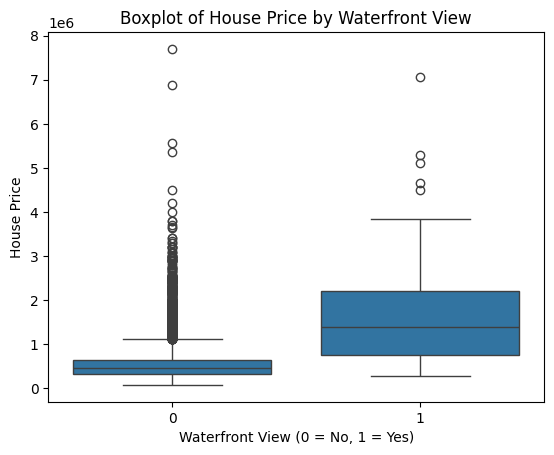

In [26]:
#to determine whether houses with a waterfront view or without a waterfront view have more price outliers.
sns.boxplot(x='waterfront', y='price', data=df)

plt.xlabel('Waterfront View (0 = No, 1 = Yes)')
plt.ylabel('House Price')
plt.title('Boxplot of House Price by Waterfront View')
plt.show()

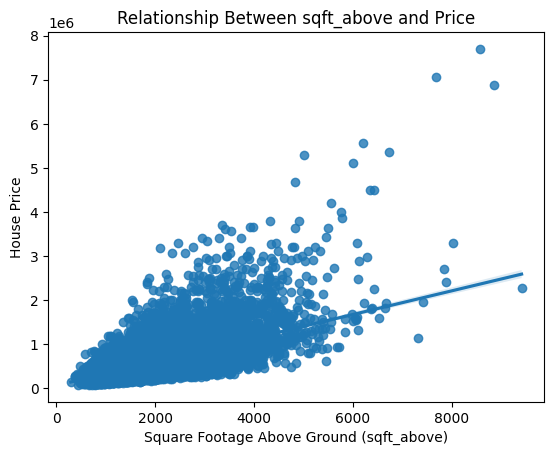

In [27]:
#to determine if the feature sqft_above is negatively or positively correlated with price

sns.regplot(x='sqft_above', y='price', data=df)
plt.xlabel('Square Footage Above Ground (sqft_above)')
plt.ylabel('House Price')
plt.title('Relationship Between sqft_above and Price')
plt.show()

In [28]:
#We can use the Pandas method corr() to find the feature other than price that is most correlated with price.
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


#Model Development

In [29]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [30]:
from sklearn.metrics import r2_score

X = df[['sqft_living']]
y = df['price']


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


r2 = r2_score(y, y_pred)
print(f"R² score: {r2:.4f}")

R² score: 0.4929


In [31]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [32]:
X = df[features]
y = df['price']


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R² score: {r2:.4f}")

R² score: 0.6577


In [33]:
estimators = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(estimators)


pipeline.fit(X, y)


y_pred = pipeline.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² score: {r2:.4f}")

R² score: 0.7513


# Model Evaluation and Refinement

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [35]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)


y_pred = ridge_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² score on test data: {r2:.4f}")

R² score on test data: 0.6479


In [38]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_poly, y_train)

y_pred = ridge_model.predict(x_test_poly)
r2 = r2_score(y_test, y_pred)
print(f"R² score on test data with polynomial features: {r2:.4f}")

R² score on test data with polynomial features: 0.7003
